# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.


Importar pandas y creación de datas con la ayuda de read_csv para lograr tener acceso a los datas.
Posteriormente uso de info() en cada df para conocer de forma de rapida el tipo de datos que contiene cada tabla y entender por donde empezar a trabajar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importar librerías

In [2]:
df_insta_ord=pd.read_csv("/datasets/instacart_orders.csv", sep=";")
df_products=pd.read_csv("/datasets/products.csv", sep=";")
df_pasillos= pd.read_csv ("/datasets/aisles.csv", sep=";")
df_depart= pd.read_csv ("/datasets/departments.csv", sep=";")
df_ord_prod= pd.read_csv("/datasets/order_products.csv", sep=";")

#leer conjuntos de datos en los DataFrames
#creacion de 5 df diferentes; 1 para cada df proporcionada, con nombres faciles de identificar para poder trabajar y leer los data.
#añade sep= para una mejor lectura de los datas.

In [3]:
df_insta_ord.info()
# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
df_products.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
df_pasillos.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
df_depart.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
df_ord_prod.info()
# mostrar información del DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones


Al mostrar por primera vez los df me percato que vienen separados por ";" lo que no logra reconocer pandas, antes de procesarlos, añadi sep= para indicar el valor correcto en cada df y lograr observar de mejor forma el df.
Al logar visualizar de mejor manera el data, logro apreciar algunas columnas de algunos datas con valores ausentes, debo evaluar su importancia en el data para saber si los elimino o sustitutyo conforme siga trabajando posteriormente.
Corroborar si los int o float me ayudan con cada dato y no hay valores datetime pero si columnas que coresponden a estos valores.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Se va a busar duplicados y valores ausentes para cada data con el uso de duplicated e isna, eliminando las filas dulicadas, haciendo cambios a columnas de ser neecsario o rellenando con los valore correctos para tener datas listos para su analisis.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [1]:
# Revisa si hay pedidos duplicados
print(df_insta_ord.duplicated().sum())

NameError: name 'df_insta_ord' is not defined

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Toda la línea de pedido esta duplicado

In [ ]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(df_insta_ord.query("order_dow == 3 and order_hour_of_day == 2 "))

#uso de query para filtrar,  porque los días estan en Números, iniciando con Domingo =0 y 2 hora  ya que el data esta en 24 horas

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

Es una minima cantidad de pedidos para el registro total.
Eisten usuarios nuevos que por primera vez hacen un pedido a media semana y en la madrugada auqnue muchos otros subsecuentes eligen esta hora para sus compras.

In [ ]:
# Elimina los pedidos duplicados
df_insta_ord=df_insta_ord.drop_duplicates()
#pide que se realicen los cambios en el df

In [ ]:
# Vuelve a verificar si hay filas duplicadas
print(df_insta_ord.duplicated().sum())
#eliminan datos duplicados con drop duplicated

0


In [ ]:
# Vuelve a verificar si hay IDs duplicados de pedidos
print(df_insta_ord["order_id"].duplicated().sum())
#verifica con la misma funcion si existe algun duplicado en una columna diferente

0


Existia una cantidad minima de filas que por error se habian duplicado, se eliminaron y se filtro el data para tener una data con la información correcta para analizar, sin temor a sesgar la informacion por pedidos que nunca se realizaron (duplicados)
Ahora dejamos el data listo y correcto para su trabajo con este.

### `products` data frame

In [ ]:
# Verifica si hay filas totalmente duplicadas
print(df_products.duplicated().sum())
#uso de duplicated y suma en todo el data para corroborar no existan fila duplicadas

0


In [ ]:
# Verifica si hay IDs duplicadas de productos
print(df_products["product_id"].duplicated().sum())
#uso de duplicated y suma en la columna especifica product id para corroborar no existan datos duplicados dentro de esa columna

0


In [ ]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print(df_products["product_name"].str.upper().duplicated().sum())

#uso de duplicated y suma en la columna de nombres para corroborar no existan datos duplicados
#se deja asignado en la columna todo en minusculas para facilitar los cambios ya encontrados

1361


In [ ]:
# Revisa si hay nombres duplicados de productos no faltantes
print(df_products[~df_products["product_name"].isna()].duplicated().sum())
#uso de tilde para filtar los no faltantes

0


Se analizo su la tabla de los prodcutos tenia duplicados hayando varios en el nombre, esto puede ser por una mala escritura, es necesario checar a detalle que datos son los que etan duplicados e ir corriegiendo para tener una lista correcta.
Para los nombres fue necesario formato a los productos.

### `departments` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
print(df_depart.duplicated().sum())
#uso de duplicated y suma en todo el data para corroborar no existan filas duplicadas

0


In [ ]:
# Revisa si hay IDs duplicadas de productos
print(df_depart["department_id"].duplicated().sum())
#uso de duplicated y suma en la columna especifica id para corroborar no existan datos duplicados

0



Este df No contiene datos duplicados con el id de los departamnetos, al ser un data muy pequeño las posibilidades de errores disminuyen, de todos modos es bueno corroborar para evitar datos incorrectos a la hora de analizar.

### `aisles` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
print(df_pasillos.duplicated().sum())
#uso de duplicated y suma todo el df para corroborar no existan datos duplicados

0


In [ ]:
# Revisa si hay IDs duplicadas de productos
print(df_pasillos["aisle_id"].duplicated().sum())
#uso de duplicated y suma en la columna especifica id para corroborar no existan datos duplicados

0


Nuevamente nos encontranos sin datos sulicados tanto en sus filas como en sus id, lo que nos da la seguridad que todos sus datos ingresados y filas mostradas estan correctas hasta el  momento de la exploracion del df

### `order_products` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
print(df_ord_prod.duplicated().sum())
#uso de duplicated y suma en todo el df para corroborar no existan datos duplicados

0


In [ ]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(df_ord_prod["order_id"].duplicated().sum())

4094961


Si pides buscar duplicados de filas no salen, pero si buscas unicamente la columna de order id salen demasiado, quiero pensar que es porue cada entrada es de una orden, pero cada entrada corresponde a cada producto seleccionado, opr eso no se duplica ninguna fila pero si la orden, ya que en la misma orden, se piden varios pproductos y cada netrada corresponde a un producto opr pedido.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [ ]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_products["product_name"].isna().sum())
#uso del metodo isna para sacar los valores ausentes en la columna de nombres del producto.


1258



De toda la lista que nos dan exiten muchos sin registro de nombre, lo que podría dificultar el analisis al ser una parte basica del negocio (es la lista de los productos que se vende), si esta info falta tenemos la base a analizar incompleta. Se debe corregir.

In [ ]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(df_products[df_products["product_name"].isna()] & (df_products[df_products["aisle_id"] == 100]))


       product_id  product_name  aisle_id  department_id
37             38         False       100             21
71             72         False       100             21
109           110         False       100             21
296           297         False       100             21
416           417         False       100             21
...           ...           ...       ...            ...
49552       49553         False       100             21
49574       49575         False       100             21
49640       49641         False       100             21
49663       49664         False       100             21
49668       49669         False       100             21

[1258 rows x 4 columns]


Los valores ausente tienen varias cosas en común, sus valores estan ausentes en el nombre, corresponden al departamento 21 y en el pasillo 100, se debe investigar que contienen eos pasillos o si son productos descontinuados para entender porque la tendencia.

In [ ]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_products[df_products["product_name"].isna()] & (df_products[df_products["department_id"] == 21]))

       product_id  product_name  aisle_id  department_id
37             38         False       100             21
71             72         False       100             21
109           110         False       100             21
296           297         False       100             21
416           417         False       100             21
...           ...           ...       ...            ...
49552       49553         False       100             21
49574       49575         False       100             21
49640       49641         False       100             21
49663       49664         False       100             21
49668       49669         False       100             21

[1258 rows x 4 columns]



Si tanto el departamento 21 y el pasillo 100 tienen relación directa con los valores ausentes. 
Tanto esta tabla como la pasada comprueban ser los mismos valores.

In [ ]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

depa= df_depart["department_id"]==21

print(df_pasillos[df_pasillos["aisle_id"] == 100].isin(depa))
#uso de isin para buscar los valores en ambas tablas

    aisle_id  aisle
99     False  False


Se encontaron la relación de ambos. Los cuales en ambos contienen Valores False por eso la relacion, se puede suponer son productos descontinuados

In [ ]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products["product_name"]=df_products["product_name"].replace("Nan","Uknown")

Todo valor ausente se le proporciona un str de Desconocido para dejar de ser valor ausente y no suponer a que se refiere el valor.

### `orders` data frame

In [ ]:
# Encuentra los valores ausentes
print(df_insta_ord.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [ ]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
pedido_1=df_insta_ord["days_since_prior_order"].fillna(value="NaN")
print(df_insta_ord[df_insta_ord ["days_since_prior_order"] != "pedido_1"])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       


Todos los valores ausentes tienen relacion con el primer pedido de los clientes

### `order_products` data frame

In [ ]:
# Encuentra los valores ausentes
print(df_ord_prod.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [ ]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_ord_prod["add_to_cart_order"].min(),df_ord_prod["add_to_cart_order"].max())

1.0 64.0



Algunas posibles fallas en el sistema no registraron el orden en que fue ingresados los productos al carrito del cleinte.
Se observa que pueden haber compras desde 1 sola pieza hasta compras hasta el momento de 64 articulos en 

In [ ]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
id_ausentes= df_ord_prod[df_ord_prod["add_to_cart_order"].isna()]

In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

print(id_ausentes['order_id'].unique())


# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


Describe brevemente cuáles son tus hallazgos.

Los valores ausentes si correspnden a compras con más de 64 productos

In [ ]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_ord_prod ["add_to_cart"]=df_ord_prod["add_to_cart_order"].fillna("999").astype("int")

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Todos los valores ausentes tienen relacion en muchas columnas de sus datas, se modifico para tener una columna con mayor legibilidad y mejor accso a los datos aunque estos sean desconocidos para nosotros.

## Conclusiones

Es necesario limpiar yverificar las tablas y sus datos para un correcto analisis posterior.
Los valors ausentes de nuestras tablas podria traer errores a la hora de analiar.
Existia mucha relacion entre los valores ausentes y categorias espcificas de los productos trayendpo más preguntas.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] 

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print(df_insta_ord["order_hour_of_day"].min())
print(df_insta_ord["order_dow"].min())

#uso de min para conocer el valor minimo de la columna

0
0


In [36]:
print(df_insta_ord["order_hour_of_day"].max())
print(df_insta_ord["order_dow"].max())
#uso de mxn para conocer el valor minimo de la columna

23
6


Escribe aquí tus conclusiones
Ambas columnas, entran dentro de los rangos sugeridos, se prefirio sacar solo los valores min y max de cada columna por practicidad.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

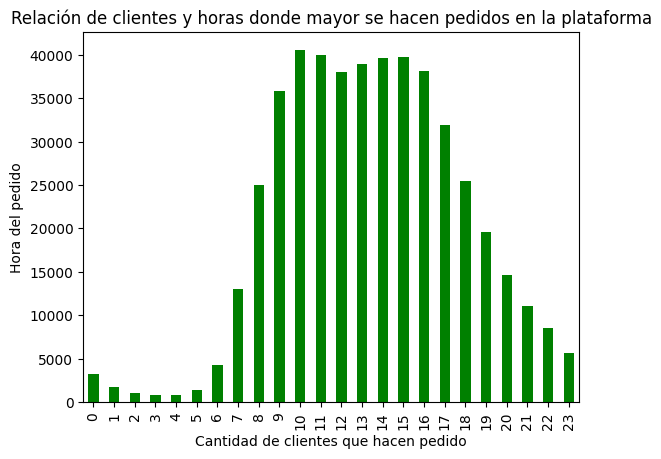

In [37]:
import pandas as pd
from matplotlib import pyplot as plt

df_insta_ord=pd.read_csv("/datasets/instacart_orders.csv", sep=";")

hora_compras=df_insta_ord.groupby("order_hour_of_day")["user_id"].count()

hora_compras.plot(y="order_hour_of_day", xlabel="Cantidad de clientes que hacen pedido", ylabel="Hora del pedido", title="Relación de clientes y horas donde mayor se hacen pedidos en la plataforma", kind="bar", color="green")
plt.show()

#se cuentan los pedidos realizados segun la hora de pedido para tener una grafica con la informacion deseada.

Escribe aquí tus conclusiones

Hacen la mayor cantidad de pedidos se realizan entre las 10 y 4 , teniendo un rango de 7 a 10, con mayor pedidos de 10 a 7 pm.
Y obteniendo algunos datos aislados en la madrugada.

### [A3] ¿Qué día de la semana compran víveres las personas?

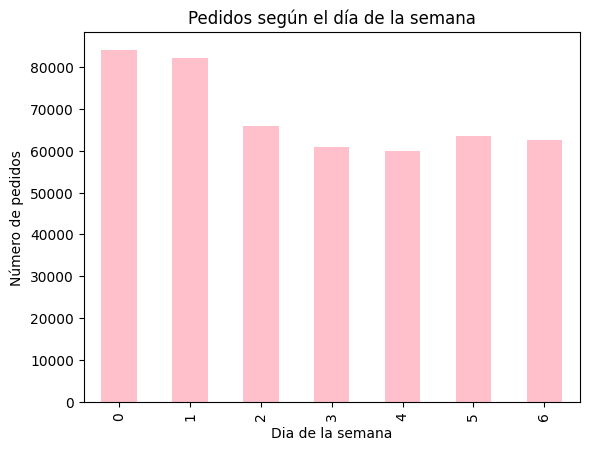

In [38]:
import pandas as pd
from matplotlib import pyplot as plt

df_insta_ord=pd.read_csv("/datasets/instacart_orders.csv", sep=";")

suma_compras=df_insta_ord.groupby("order_dow")["order_id"].count()

suma_compras.plot(x="order_dow", xlabel="Dia de la semana", ylabel="Número de pedidos", title="Pedidos según el día de la semana", kind="bar", color="pink")
plt.show()

Escribe aquí tus conclusiones


Mayormente se realizan las compras los Días Domingo y Lunes, y teniendo una tendencia muy similar aunque menor el resto de la semana

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

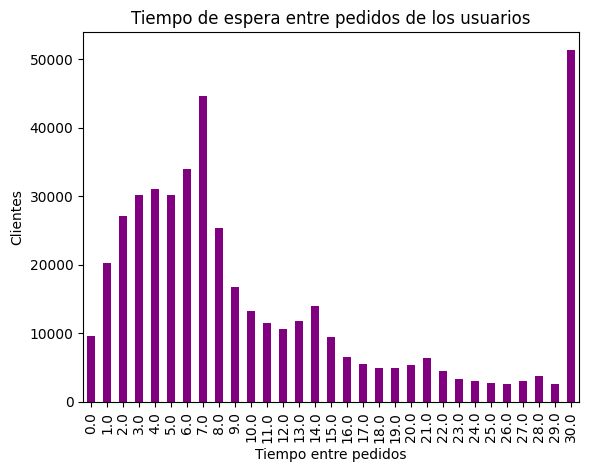

In [39]:
import pandas as pd
from matplotlib import pyplot as plt

df_insta_ord=pd.read_csv("/datasets/instacart_orders.csv", sep=";")

tiempo_espera=df_insta_ord.groupby("days_since_prior_order")["order_id"].count()

tiempo_espera.plot(x="days_since_prior_order", ylabel="Clientes", xlabel="Tiempo entre pedidos", title="Tiempo de espera entre pedidos de los usuarios", kind="bar", color="purple")
plt.show()
#crear grafico para mostrar el tiempo que la gente espere entre pedidos y mostrar minimo y maximo 

Escribe aquí tus conclusiones

Existe una tendencia mayor de esperar 7 días (1 semana entre pedidos) aunque existe inclinacion a la izquierda, lo que puede ir de 1 a 7 días principalemnte lo que esperen los clientes para volver a pedir.
La maxima obersvada fue de 30 días (1 mes) y la minima de 29 días.

# [B] 

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

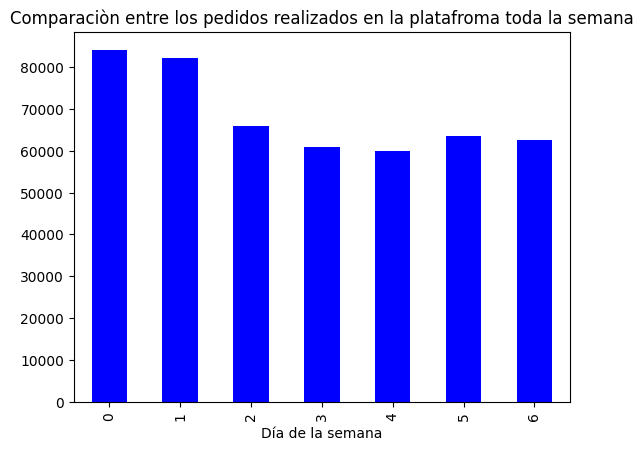

In [40]:
import pandas as pd
from matplotlib import pyplot as plt

df_insta_ord=pd.read_csv("/datasets/instacart_orders.csv", sep=";")

comparacion_compras=df_insta_ord.groupby("order_dow")["order_hour_of_day"].count()

comparacion_compras.plot(x="order_hour_of_day", xlabel="Día de la semana", kind="bar", title="Comparaciòn entre los pedidos realizados en la platafroma toda la semana", color="blue")

plt.show()
#grafico general de barras para todos los dias

In [41]:
miercoles_orders = df_insta_ord[df_insta_ord['order_dow']==3]  # filtro para obtener los valores de los miércoles
miercoles_barras = miercoles_orders.groupby(by='order_hour_of_day')['order_id'].count() 

sabado_orders = df_insta_ord[df_insta_ord['order_dow']==6]  # filtro para obtener los valores de los sabados
sabado_barras = sabado_orders.groupby(by='order_hour_of_day')['order_id'].count() 

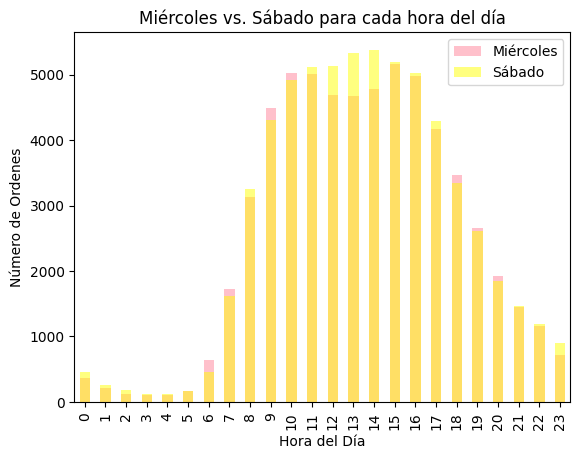

In [42]:
miercoles_barras.plot(kind='bar',                            # gráfica de barras para miércoles
            color='pink',                          
            alpha = 1
        )


sabado_barras.plot(kind='bar',                            # creo una gráfica de barras para sábado
                xlabel = "Hora del Día",           
                ylabel = "Número de Ordenes",
                color='yellow',
                alpha = 0.5
            )


plt.title("Miércoles vs. Sábado para cada hora del día")    
plt.legend(["Miércoles", "Sábado"])                         
plt.show()

Escribe aquí tus conclusiones

Comparando los dias sabado y miercoles existe una similitud en la cantidad de pedidos que entran esos días, siendo ligermanete mayor los dias sábado.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

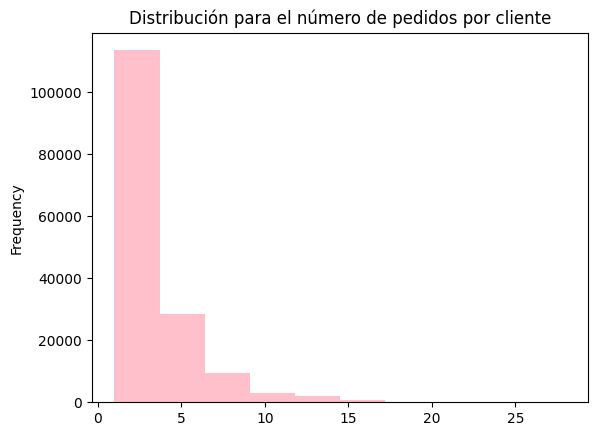

In [43]:
orden_por_cliente= df_insta_ord['user_id'].value_counts()

orden_por_cliente.plot(kind='hist',xlabel = "número de pedidos", ylabel = "Ordenes",title ='Distribución para el número de pedidos por cliente', color = "pink")
plt.show()

Escribe aquí tus conclusiones

En promedio la compra prinicpal de productos dentro de la plataforma es de 5 productos por pedido, compras mayores a  productos llegan a ser minimas y casi nulas de 15 en adelante.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [44]:
#unir info de los datas .
prod_id_y_nombre = df_ord_prod.merge(df_products, on = 'product_id')


In [45]:
# creo variable para almacenar las columnas necesarias.
top_20 = prod_id_y_nombre[['product_id','product_name','order_id']]


In [46]:
# agrupo por product_id y name las ordenes. luego uso count, sort_values, head(20) y reset_index.
top_20 = top_20.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending = False).head(20).reset_index()
top_20

,product_id,product_name,order_id
0,24852,Banana,66050
1,13176,Bag of Organic Bananas,53297
2,21137,Organic Strawberries,37039
3,21903,Organic Baby Spinach,33971
4,47209,Organic Hass Avocado,29773
5,47766,Organic Avocado,24689
6,47626,Large Lemon,21495
7,16797,Strawberries,20018
8,26209,Limes,19690
9,27845,Organic Whole Milk,19600


Escribe aquí tus conclusiones

Los productos mas vendidos son comida fresca, lo que tiene relacion con la frecuencia de sus pedidos, ya que la vida de estos productos no suele superar 1 o 2 semanas como máximo

# [C] 

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [47]:

# variable para saber qué #de artículos se piden
Top_5 = df_ord_prod.groupby('order_id')['product_id'].count().sort_values().reset_index()


In [48]:
# pide solo mostrar 5 artículos más repetidos.
Top_5 =Top_5.groupby('product_id')['order_id'].count().sort_values(ascending= False).head(5)

print(Top_5)

product_id
5    31923
6    31698
4    31054
7    30822
3    29046
Name: order_id, dtype: int64


<AxesSubplot:title={'center':'Articulos comprandos normalmente por pedido'}, ylabel='Frequency'>

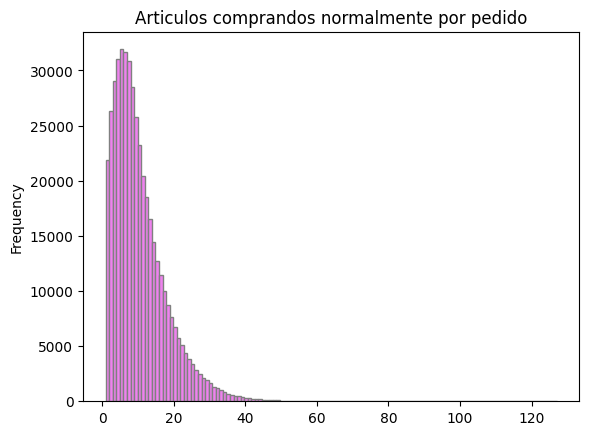

In [49]:
# crea variable, agrupo por order_id y cuento los valores en product_id.
prod_por_orden = df_ord_prod.groupby('order_id')['product_id'].count()

# creo un histograma
prod_por_orden.plot(kind='hist',bins=127, xlabel = "número de productos por Orden", title ='Articulos comprandos normalmente por pedido', color = "violet",edgecolor='gray' )

In [50]:
prod_por_orden.describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

Escribe aquí tus conclusiones

la cantidad más popular de productos pedidos por pedidos es de 5 productos, con un promedio de 8 piezas, minimo 1 y maximo 127, los valores extremos nos dificultan medir de forma más precisa los resultados.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [51]:
#imprimir 20 articulos, filtrando los mas repetidos

prod_por_reorden = prod_id_y_nombre[prod_id_y_nombre['reordered'] ==1]


In [52]:

prod_por_reorden.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending = False).head(20)


product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: order_id, dtype: int64

Escribe aquí tus conclusiones

Lo mas comprado son platanos y bolsas para los mismos, aunque si analizamosla lista completa los productos más vendidos son frutas y verduras organicas,lo que nos da una idea del tipo de productos que ofrece el lugar. 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [53]:
#de cada producto filtro mostrando conteo de cuantas vces lo vuelven a pedir
#uso de columna creada anteriormente y solo se agrupa y saca el promedio solicitado


prod_id_y_nombre.groupby(['product_id','product_name'])['reordered'].mean()

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

Escribe aquí tus conclusiones

el resultado nos muestra el porcentaje de cuantas veces se a vuelto a pedir para cada producto, siendo muy distinto para cada uno, mostrando que no eiste un relación obvia entre los productos y ue se vuelvan a pedir aparentemente.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [54]:
#filtro por cliente, repeticion de pedidos previamente
client_prod=df_ord_prod.merge(df_insta_ord, on = 'order_id')


In [55]:
porcentaje_reorden = client_prod.groupby(['user_id'])['reordered'].mean()

In [56]:
print(porcentaje_reorden)

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


Escribe aquí tus conclusiones

Cada usuario tiene un porcentaje de acuerdo a cuentas veces ha vuelto a pedir en la plataorma, se puede orden en porcentajes para conocer los usuarios con mayor uso y buscar patrones en su compras para futuras investigaciones.
Entre mayor porcentaje muestre el resultado mayor numero de compras han realizado.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [57]:
#filtrar por oden de añadidura en el carrito
primeros_prod = prod_id_y_nombre[prod_id_y_nombre['add_to_cart_order']==1] 


In [58]:
top_20 = primeros_prod.groupby("product_id").size().rename("count").nlargest(20)


In [59]:
#mosrtrar los primeros 20 màs populares 
first_20_table = df_products.join(top_20, how='right')
print(first_20_table)

            product_id                                       product_name  \
product_id                                                                  
24852            24853                          Shredded 3 Cheese Italian   
13176            13177           Warrior Blend Vanilla Dietary Supplement   
27845            27846                                     Calimyrna Figs   
21137            21138             Fat Free Low Sodium Poppyseed Dressing   
47209            47210                        Fresh Farmed Tilapia Fillet   
21903            21904  Earth Paste Amazingly Natural Toothpaste Peppe...   
47766            47767                           Essential Enzymes 500 Mg   
19660            19661                                Slider Freezer Bags   
16797            16798                      Chicken Breast Grilled Strips   
27966            27967                               Egg Pasta Fettuccine   
44632            44633            Hearty Chicken with Vegetables RTS Soup   

Escribe aquí tus conclusiones
Aqui se observan los productos que más facil se reordenan según los clientes

### Conclusion general del proyecto:

En la primera seccion se busco profudizar en la limpieza de datos para un mejor analisis de los mismos, con ya un conjuto de datas a usar al mismo tiempo.
Además de conocer la información en el data para conocer un poco más y logrando demostar nuestros resultados de formas mucho más faciles de exlicar con el uso de graficas los cuales facilitan la entrega de resultados al equipo de trabajo.
Es importante reconocer la importancia de todos nuestros datos obtenidos para su uso posterior dentro de la empresa para hacer crecer el negocio o investigar a fondo a los clientes y mejorar su experiencia en la plataforma, compras, productos nuevos, promociones, etc y todo gracias a nuestro analisis.

Durante este proyecto se hizo el analisis detallado de diferentes puntos de los data, combinando datas y permitiendonos explorar de el patron de uso de esta aplicacion.

En la primera parte: se analizo las horas más populares para ordenar que van de las  9 a las 5, los días más populares para hacer pedidos domingo y lunes, 
y el tiempo de esperan para hacer otro pedido que va de los 30 dias seguido por 7 dias, logrando analizar el comportamiento del usuario.

En la segunda parte:
Se hizo la comparativa de los pedidos en 2 dias difernetes de la semana (miercoles y sabado), la hora de mayor pedidos 12 y 2.

Logramos observar cuantos productos se compran en promedio por compra que van de 1 a 5 productos.
Y conociendo los 20 productos más populares, liderada por platanos, bolsas de platanos y frutas y verduras organicas.

En la tercera parte:
Se conocio cuantos productos se compran por pedido promedio, que son 5, los 20 productos que mas se piden y cuantas veces se vuelven a pedir, logrando observar la satisfacccion del cliente con los productos el cual es relacionaod con su reordenamiento en siguientes pedidos.
Hasta ubicar en que orden sevuelven a comprar, indicando preferencias.